# Callback implementation

Using callback to stop training loop process when certain criteria met, for example if accuracy reach certain threshold value then we can stop the training instead keep looping on each configured epoch.

## Load and Normalize the Fashion MNIST dataset

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

we use sklear standard scaler to standardize value of the image matrices

Since standard scaler only accept array of 2 dimension or less then we have to flatten it first

In [10]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()


x_train = standard_scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
x_test = standard_scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

In [15]:
print(standard_scaler.mean_)
print(standard_scaler.scale_)
print(x_test[1].max())
print(x_test[1].min())

[  2.83046071   8.82074583  12.329625    20.13564048  36.35266488
  53.6226756   64.3157881   71.41940476  84.21023512 100.38854048
 113.8244131  119.39914286 121.45557738 117.64882619 115.28248869
 123.94884345 127.3110131  124.55448988 116.96382619 101.71519583
  87.34639524  80.41064643  73.42530179  60.00671369  43.29406071
  32.45027976  23.25701786   5.6098494 ]
[16.8978002  37.24036361 43.35994812 54.00575307 69.81424845 82.95176276
 88.21487457 89.07176046 90.88103678 91.31587518 90.32845534 89.20347244
 89.50146891 89.65877659 90.13530481 88.95004645 87.55221413 87.54299589
 89.42859357 91.07327116 91.91983034 92.71677656 91.51236123 85.26390527
 75.8542581  69.26540769 60.71634004 23.35810887]
2.4276437016679235
-1.4541152883172466


## Creating a Callback class

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

## define and compile the model

In [22]:
## define and compile model

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Train the model with a callback
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4405 - accuracy: 0.8422
Epoch 2/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.3352 - accuracy: 0.8790
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3349 - accuracy: 0.8791


In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


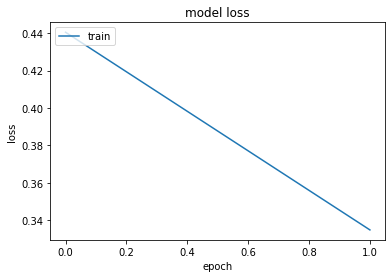

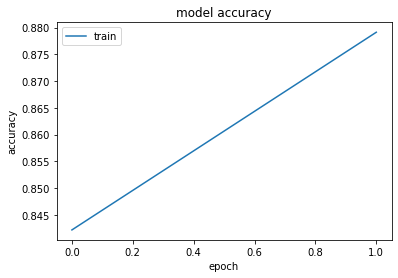

In [26]:
import matplotlib.pyplot as plt


# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

### compare if we use divide by 255 scale

In [27]:
# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
## define and compile model

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with a callback
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4786 - accuracy: 0.8299
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3598 - accuracy: 0.8678
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3600 - accuracy: 0.8678


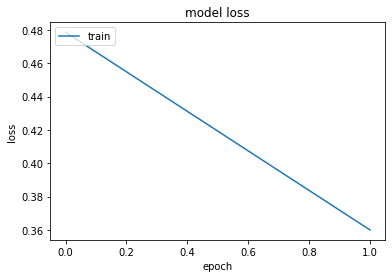

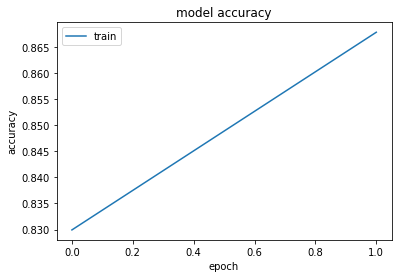

In [29]:

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()